# Main usage and visualization 
> Runtime: about 2min.

This notebook is run on the POISED dataset.

In [1]:
import scyan

Global seed set to 0


## Model initialization and fitting
> If you use your own dataset, use `Scyan` default parameters first.

In [2]:
adata, table = scyan.data.load("poised") # Load data

model = scyan.Scyan(adata, table)

INFO:scyan.model:Initialized Scyan model with N=4178320 cells, P=24 populations and M=19 markers.
   ├── No covariate provided.
   └── Batch correction mode: False


In [3]:
model.fit()

INFO:scyan.model:Training scyan with the following hyperparameters:
"batch_key":       None
"batch_size":      16384
"hidden_size":     16
"lr":              0.001
"max_samples":     200000
"modulo_temp":     2
"n_hidden_layers": 7
"n_layers":        7
"prior_std":       0.25
"temperature":     0.5

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/quentinblampey/Library/Caches/pypoetry/virtualenvs/scyan-5lsXrWE1-py3.9/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:200: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(

  | Name   | Type        | Params
---------------------------------------
0 | module | ScyanModule | 35.7 K
---------------------------------------
35.7 K    Trainable params
0         Non-trainable params
35.7 K    Total params
0.143     Total estimated model 

Training: 0it [00:00, ?it/s]

INFO:scyan.model:Successfully ended traning.


Scyan model with N=4178320 cells, P=24 populations and M=19 markers.
   ├── No covariate provided.
   └── Batch correction mode: False

### Run predictions
Predictions are saved in `adata.obs.scyan_pop` by default
> NB: The cells that are unknown are annotated by `np.nan`

In [4]:
model.predict();

DataLoader:   0%|          | 0/256 [00:00<?, ?it/s]

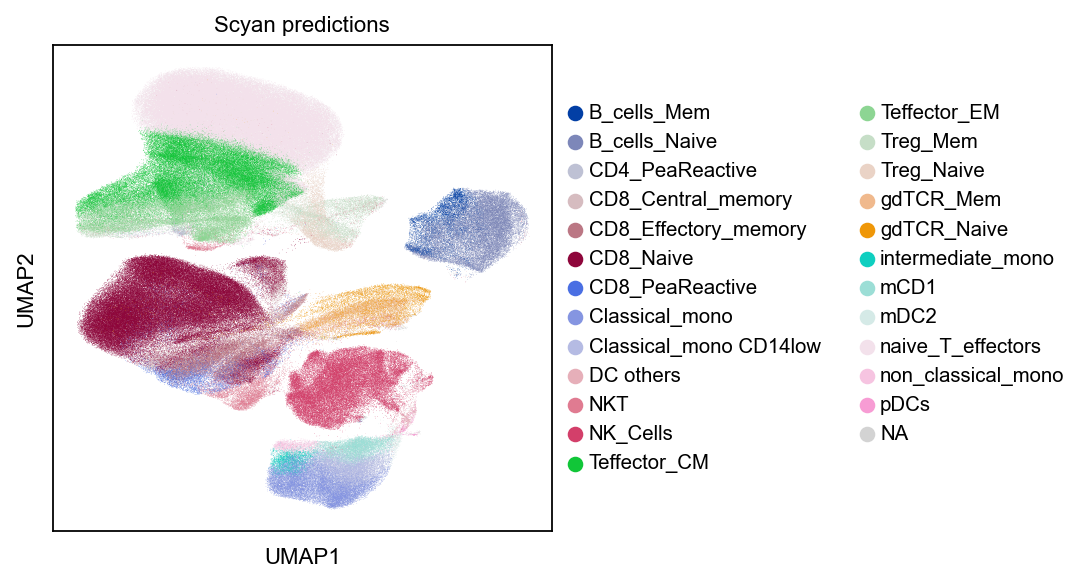

In [5]:
scyan.plot.umap(adata, color="scyan_pop", title="Scyan predictions")#, palette=adata.uns["palette"])

## Visualization and interpretability

### Latent expressions for all populations

Expressions close to $-1$ represent negative expressions, while expressions close to $1$ represent positive expressions. Thus, $0$ can be considered as a mid expression.

DataLoader:   0%|          | 0/13 [00:00<?, ?it/s]

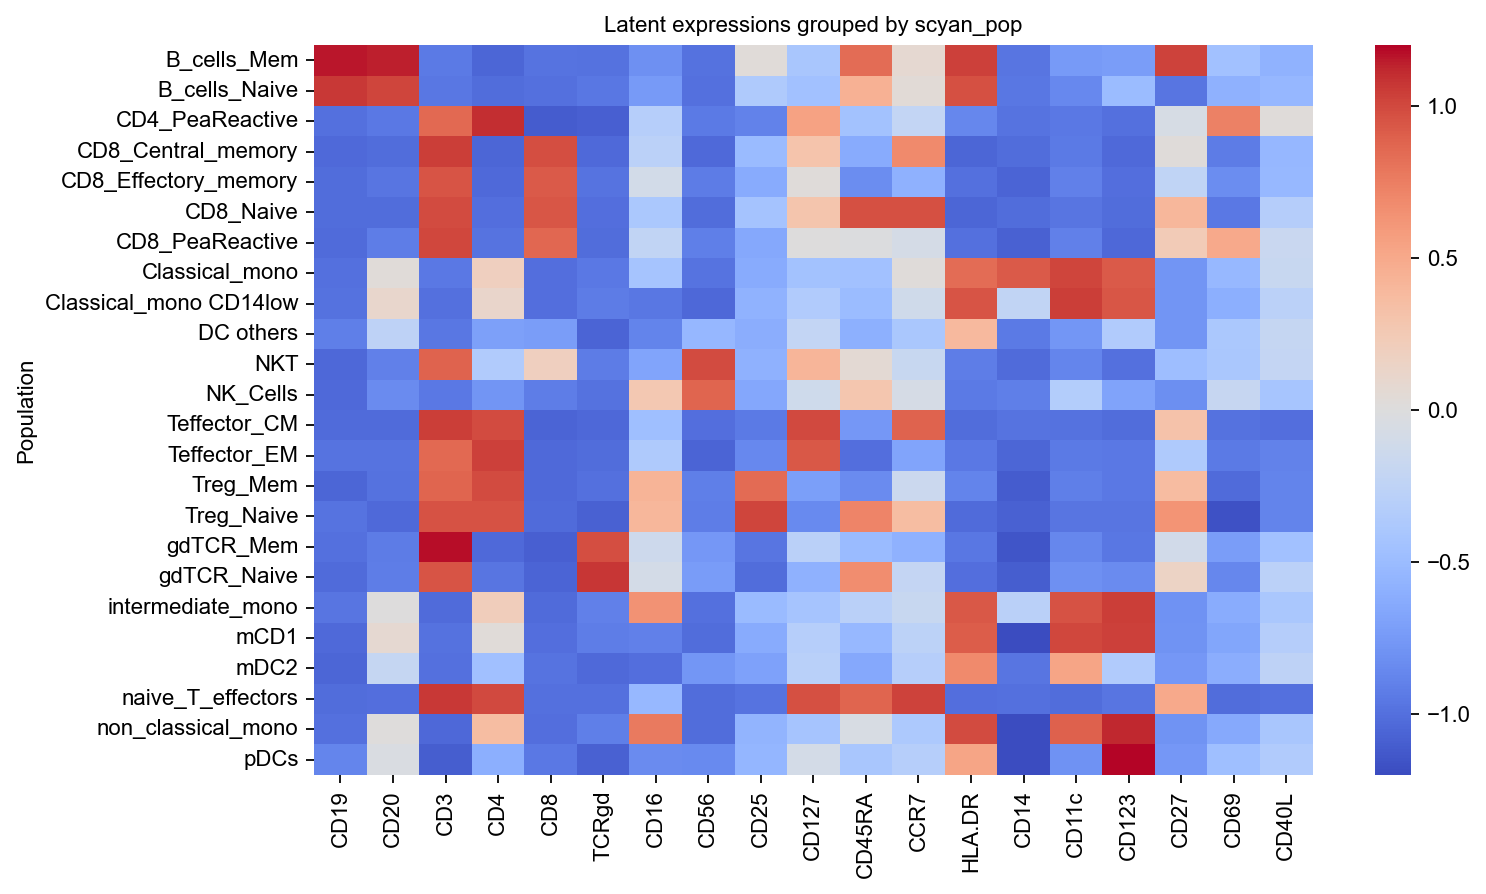

In [6]:
scyan.plot.pops_expressions(model)

### Pairwise scatter plots
CD8 T cells populations separation on 3 scatter plots.

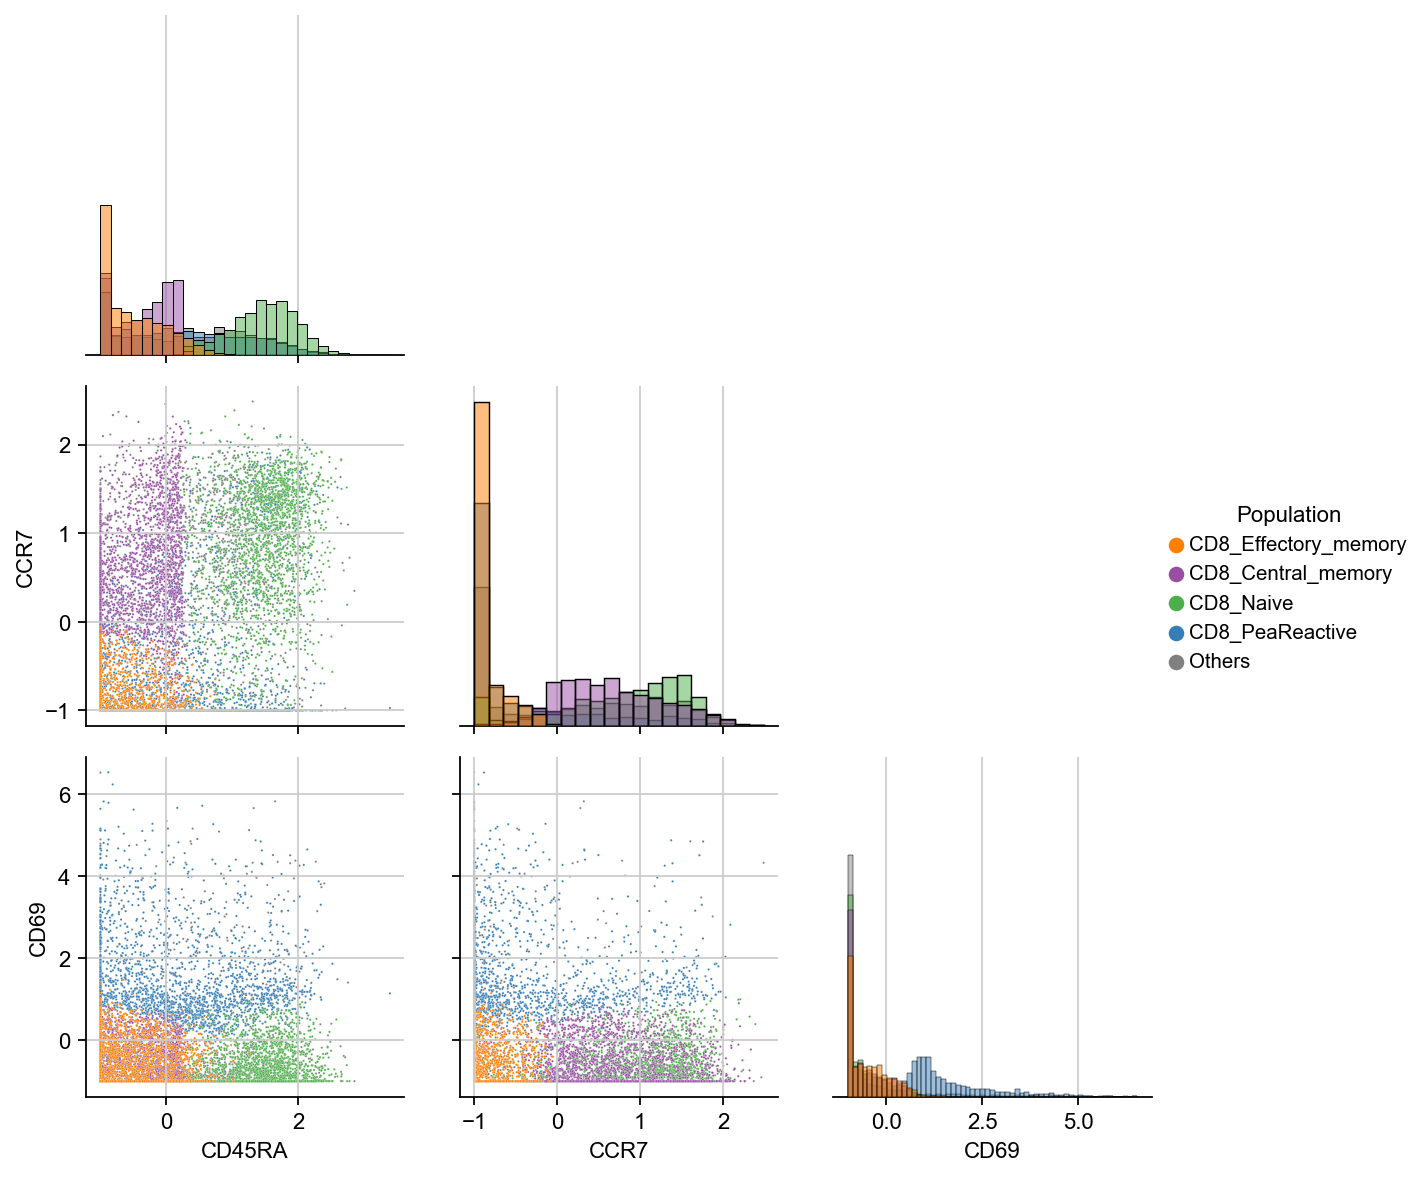

In [10]:
t_cd8 = ['CD8_Effectory_memory', 'CD8_Central_memory', 'CD8_Naive', 'CD8_PeaReactive']
scyan.plot.scatter(adata, t_cd8, n_markers=3)

### Model interpretability for one population
Let's now consider one specific population: NKT cells.

In [11]:
population = "NKT"

DataLoader:   0%|          | 0/5 [00:00<?, ?it/s]

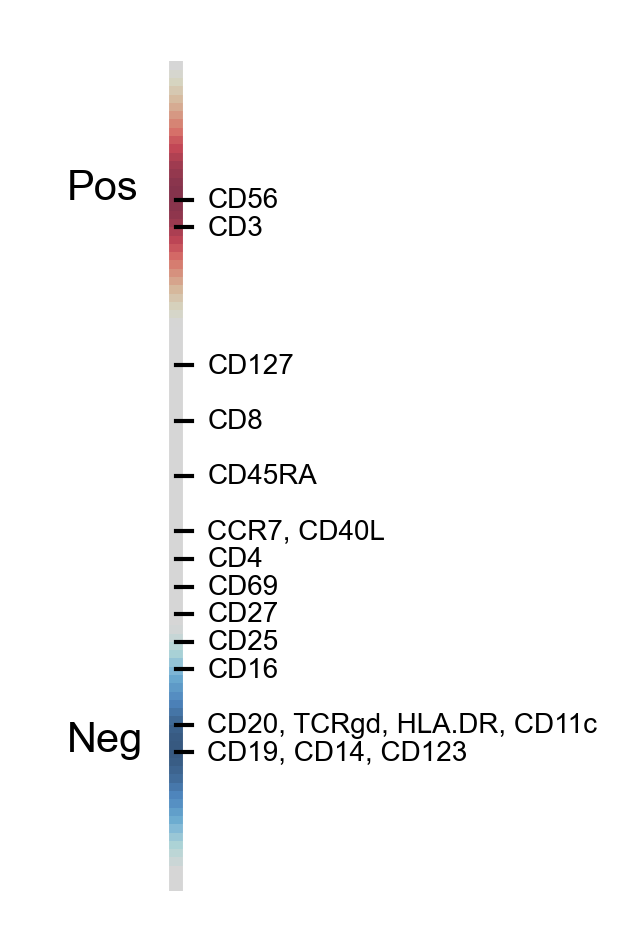

In [12]:
scyan.plot.pop_expressions(model, population)

Interpret why Scyan predicted NKT and not another population. Dark values correspond to a marker that reduces the confidence in predicting a population.

E.g., the dark value on (NK_Cells, CD3) means that the expressions of CD3 of the targeted cells (that is positive, according to the above figure) reduced the model confidence to predict NK_cells, which is indeed expected.

DataLoader:   0%|          | 0/5 [00:00<?, ?it/s]

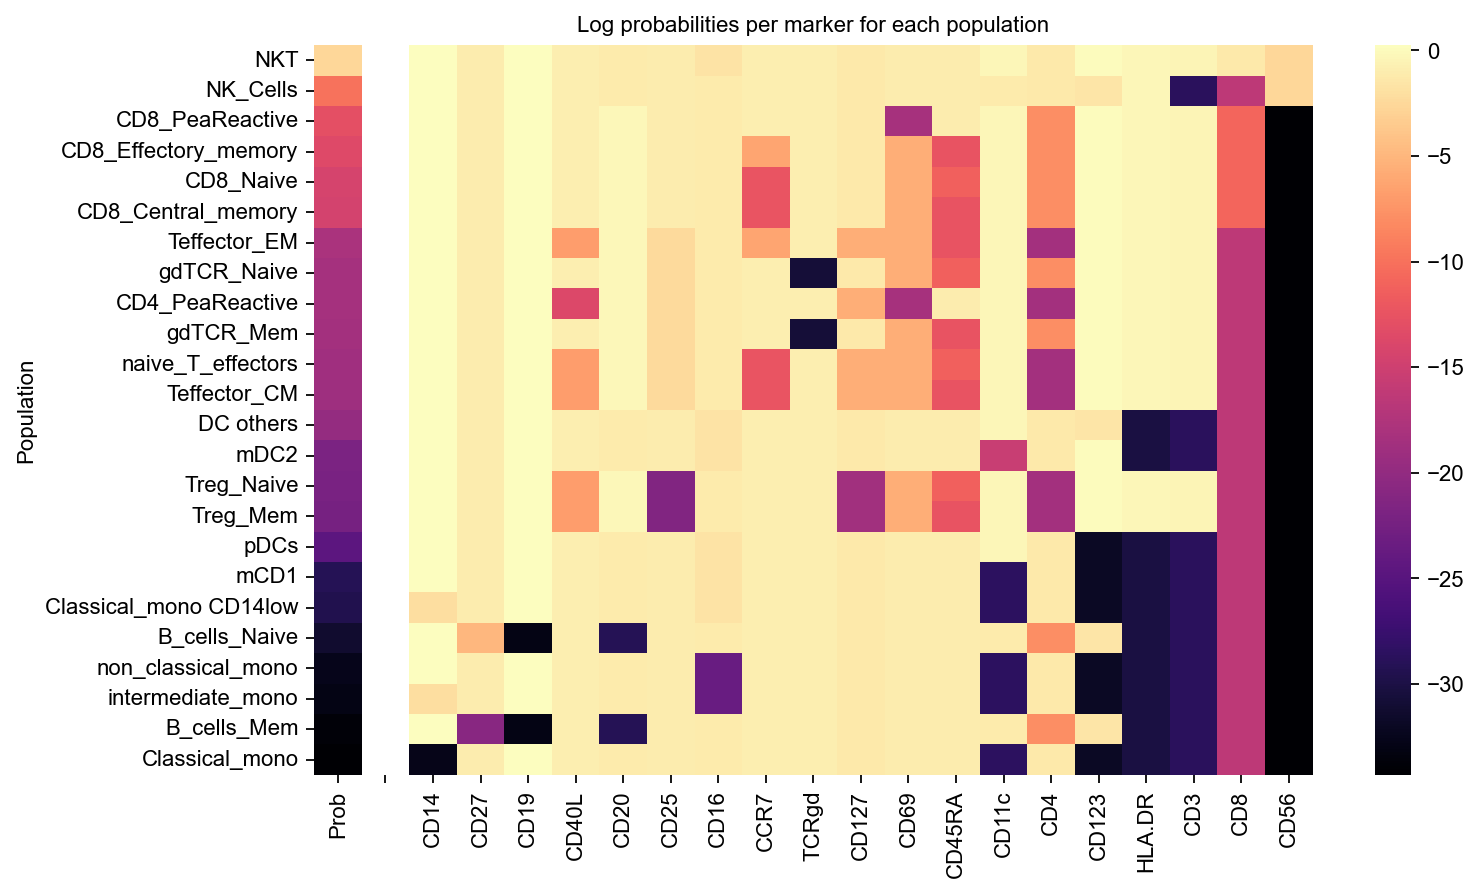

In [13]:
scyan.plot.probs_per_marker(model, population)